## Import Library and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_18/2998024819.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Import Data

In [2]:
df = pd.read_csv('/kaggle/input/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [5]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


**Observation : Here we can notice that minimum vale of `YearMade` is 1000 which look some sort of error**

#### Make copy of original dataset before making and changes.

In [6]:
df_temp = df.copy()

#### Work on `YearMade` column where values are equal to 1000.

In [7]:
np.sort(df['YearMade'].unique())


array([1000, 1919, 1920, 1937, 1942, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [8]:
df[df['YearMade'] == 1000].shape, df.shape

((39391, 53), (412698, 53))

Here size of `YearMade` with value of 1000 is considerably large. Hence removing it from dataset is considerably good for our model.

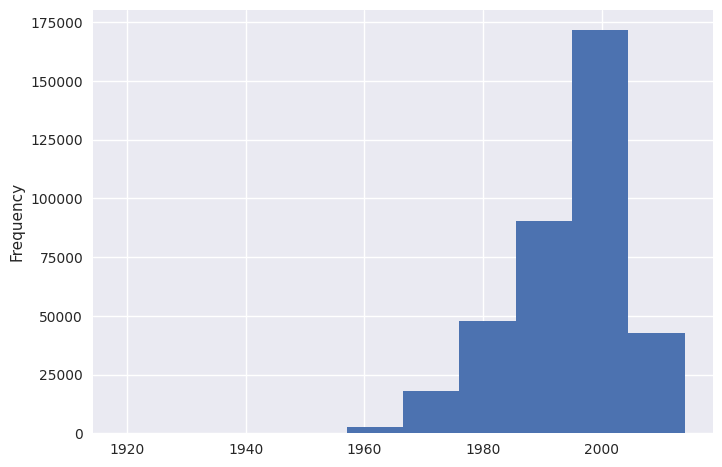

In [9]:
df[df['YearMade'] != 1000]['YearMade'].plot(kind='hist');

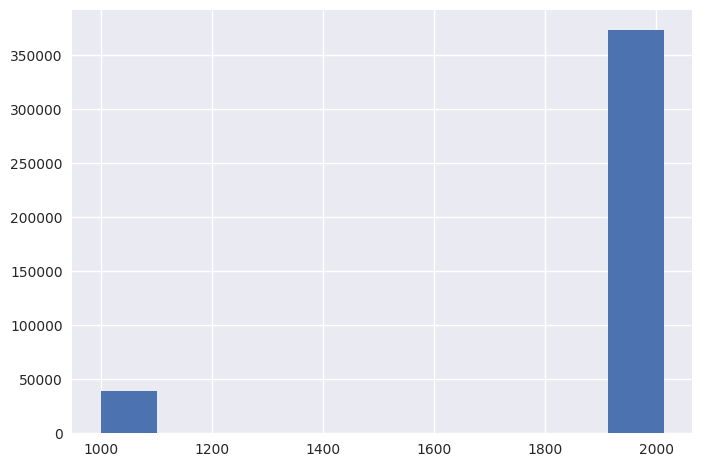

In [10]:
plt.hist(df['YearMade']);

#### Replace `YearMade` with median value that is `1995`

In [11]:
df_temp['YearMade'].replace(1000, 1995, inplace=True)

Now, `Year` equals to 1000 are removed

#### Here datatype of saledate column is object.
Let us first convert it to datetime datatype

In [12]:
df_temp['saledate'] = pd.to_datetime(df_temp['saledate'])

In [13]:
df_temp['saledate'].dtype

dtype('<M8[ns]')

Now saledate column is converted to datetime64 datatype.

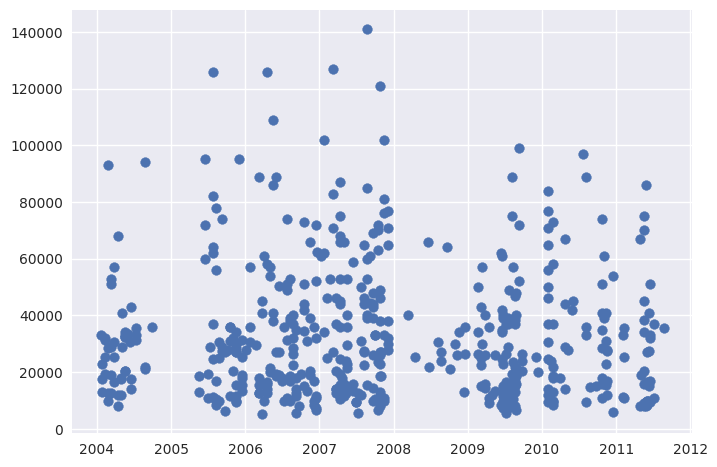

In [14]:
plt.scatter(df_temp['saledate'][:500], df_temp['SalePrice'][:500]);

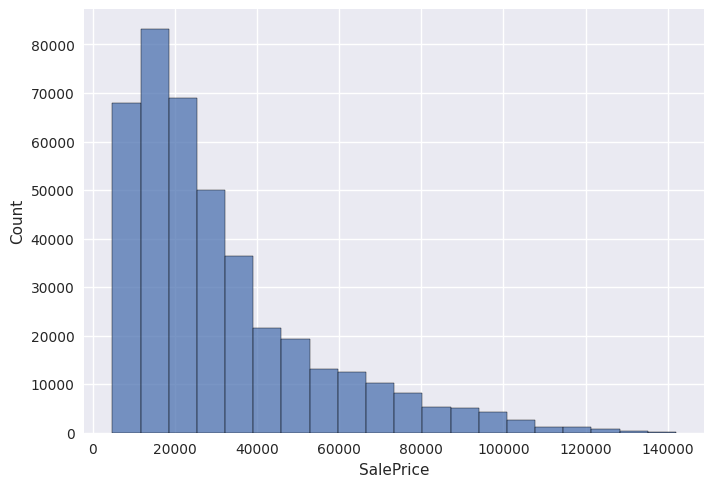

In [15]:
sns.histplot(df_temp['SalePrice'], bins=20);

**Observation : Above SalePrice is right skewed distribution.**

#### Sort the dataframe by date because we are working with time series data. It will make our task easy.

In [16]:
df_temp.sort_values(by='saledate', inplace=True)
df_temp['saledate']

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

#### Now, Extracting Year, Month and day from `saledate` column


In [17]:
df_temp['saleYear'] = df_temp['saledate'].dt.year
df_temp['saleMonth'] = df_temp['saledate'].dt.month
df_temp['saleDay'] = df_temp['saledate'].dt.day
df_temp["saleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayOfYear"] = df_temp.saledate.dt.dayofyear

Now, Remove `saledate` column from dataset as we extracted all the values from it

In [18]:
df_temp.drop('saledate', axis=1, inplace=True)
'saledate' in df_temp.columns

False

In [19]:
df_temp.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1994.019918,3.522988e+03,2004.317382,6.300268,16.152894,2.594338,176.784094
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,9.220268,2.716993e+04,5.821090,3.437276,8.429510,1.417971,103.910718
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1919.000000,0.000000e+00,1989.000000,1.000000,1.000000,0.000000,1.000000
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1989.000000,0.000000e+00,2000.000000,3.000000,9.000000,2.000000,82.000000
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00,2006.000000,6.000000,16.000000,3.000000,165.000000
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03,2009.000000,9.000000,23.000000,3.000000,270.000000
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06,2012.000000,12.000000,31.000000,6.000000,365.000000


## Explanotary Data Analysis

### Top 5 States in terms of total sales

In [20]:
state_df = df_temp.groupby(by='state').agg({"SalePrice": ["sum"]})
state_df.columns = ['Total sale']
state_df['Total sale'] = state_df['Total sale'].div(1000000)
state_df.sort_values(by='Total sale',axis=0, ascending=False, inplace=True)

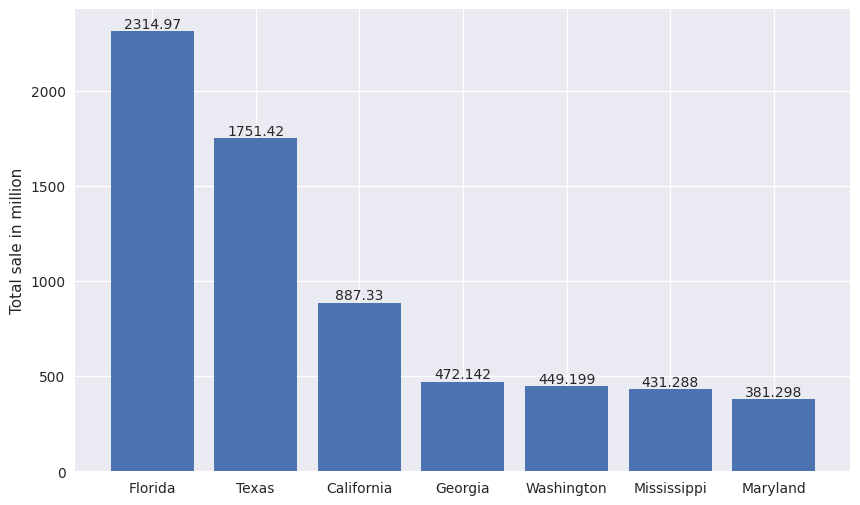

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
top_states = state_df[:7]

bars = ax.bar(top_states.index, height=top_states['Total sale'])

label= []
for bar in bars:
  label.append(bar.get_height())

ax.set_ylabel("Total sale in million")
plt.bar_label(bars);

Florida, Texas and California are top performer

### Plot total number of sales in terms of year and month

In [22]:
year_df = df_temp['saleYear'].value_counts().reset_index()
year_df.columns = ['Sale Year', 'Total number of sales']

month_df = df_temp['saleMonth'].value_counts().reset_index()
month_df.columns = ['Sale Month', 'Total number of sales']
month_df.sort_values('Sale Month', inplace=True)
month_df['Sale Month'] = month_df['Sale Month'].apply(lambda x: dt.date(2024, x, 1).strftime("%b"))

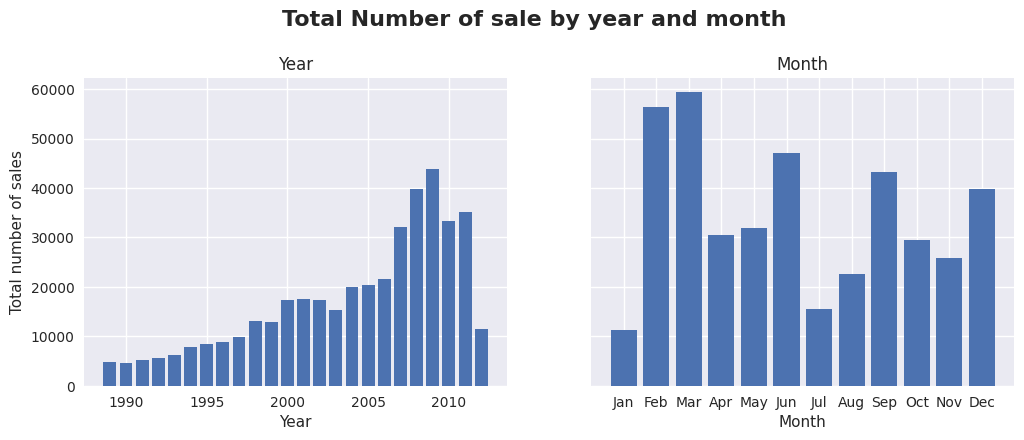

In [23]:
fig, (year_ax, month_ax) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=True)

year_ax.bar(year_df['Sale Year'], year_df['Total number of sales'])
year_ax.set_title("Year")
year_ax.set_xlabel("Year")
year_ax.set_ylabel("Total number of sales")

month_ax.bar(month_df['Sale Month'], month_df['Total number of sales'])
month_ax.set_title("Month")
month_ax.set_xlabel("Month")

fig.suptitle('Total Number of sale by year and month', fontsize=16, fontweight='bold', y=1.05);

- 2008 and 2009 are top 2 years which see maximum number of sales.
- February and March are top months in terms of number of sales.

## Data Preparation and Preprocessing

### Find and Fill missing value in numeric colums

#### Find columns whose type is numeric.

In [24]:
for col in df_temp.columns:
  if pd.api.types.is_numeric_dtype(df_temp[col]):
    if df_temp[col].isna().sum():
      print(col)

auctioneerID
MachineHoursCurrentMeter


`auctioneerID` and `MachineHoursCurrentMeter` are the numerical columns which have null value.

Now fill the null values, But with what value?

In [25]:
df_temp['auctioneerID'].describe()

count    392562.000000
mean          6.585268
std          17.158409
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          99.000000
Name: auctioneerID, dtype: float64

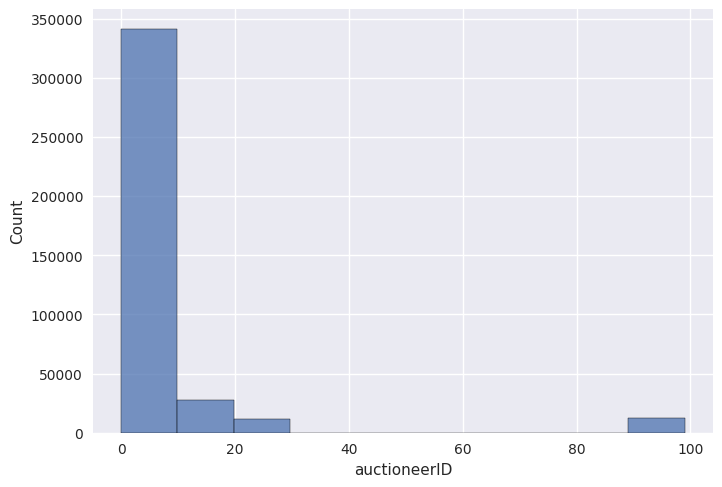

In [26]:
sns.histplot(data = df_temp['auctioneerID'], bins=10);

**Observation : Above auctioneerID is right skewed distribution.**

Hence median will be good to go because mean are sensitive to outliers

In [27]:
df_temp['MachineHoursCurrentMeter'].describe()

count    1.475040e+05
mean     3.522988e+03
std      2.716993e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.209000e+03
max      2.483300e+06
Name: MachineHoursCurrentMeter, dtype: float64

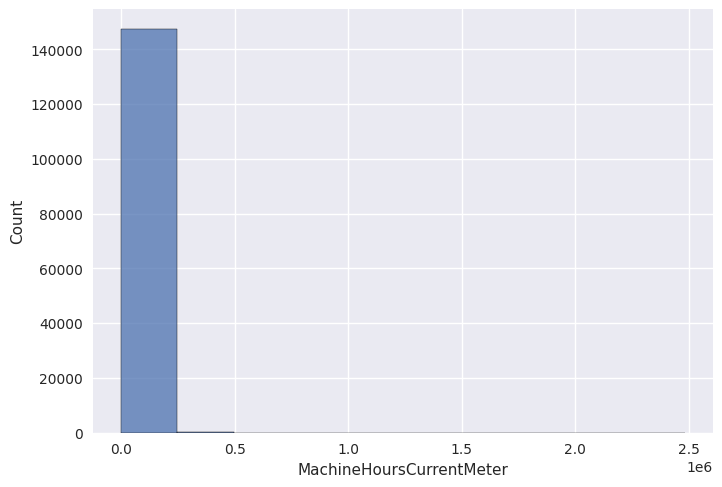

In [28]:
sns.histplot(df_temp['MachineHoursCurrentMeter'], bins=10);

#### Fill missing value with median

In [29]:
for col in df_temp.columns:
  if pd.api.types.is_numeric_dtype(df_temp[col]):
    if df_temp[col].isna().sum():
      # add a column which tell if data is missing or not
      df_temp[col+'_is_missing'] = df_temp[col].isna()
      df_temp[col].fillna(df_temp[col].median(), inplace=True)

In [30]:
for col in df_temp.columns:
  if pd.api.types.is_numeric_dtype(df_temp[col]):
    if df_temp[col].isna().sum():
      print(col)

Above loop doesn't print anything. Hence no numeric column has null value

### Find and Fill the categorical columns

#### Find columns whose type is object
Here I am filling values by converting to `category` type and use `codes` property to fill the value

In [31]:
for col in df_temp.columns:
  if pd.api.types.is_object_dtype(df_temp[col]):
    df_temp[col] = df_temp[col].astype('category')

#### Now fill the null values.


In [32]:
for col in df_temp.columns:
  if pd.api.types.is_categorical_dtype(df_temp[col]):
    df_temp[col+'_is_missing'] = df_temp[col].isna()
    df_temp[col] = df_temp[col].cat.codes+1

In [33]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

No null value present. Move forward for fitting the model

In [34]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


## Model Fitting

In [35]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#### Extract validation set from dataset

In [36]:
train_df, valid_df = df_temp[df_temp['saleYear'] != 2012], df_temp[df_temp['saleYear'] == 2012]

#### Extract training and testing data.

In [37]:
X_train, y_train = train_df.drop(['SalePrice'], axis=1), train_df['SalePrice']
X_valid, y_valid = valid_df.drop(['SalePrice'], axis=1), valid_df['SalePrice']

In [38]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Model dictionary

In [39]:
baseline_models = {
    'ridge': Ridge(max_iter=2000),
    'lasso': Lasso(),
    'elasticnet': ElasticNet(max_iter=2000),
    'rfr': RandomForestRegressor(max_samples=10000)
}

### Evaluation metric function

In [40]:
def rmsle(y_valid, val_preds):
  return np.sqrt(mean_squared_log_error(y_valid, val_preds))


def evaluate_scores(model):
  val_preds = model.predict(X_valid)
  val_preds = np.abs(val_preds)

  model_scores = {
      'R2_Score' : r2_score(y_valid, val_preds),
      'MSLE' : mean_squared_log_error(y_valid, val_preds),
      'RMSLE' : rmsle(y_valid, val_preds),
      'MAE' : mean_absolute_error(y_valid, val_preds),
  }
  return model_scores

### Fit baseline models.

In [41]:
%%time
baseline_score = {}

for model_name, model in baseline_models.items():
  model = model.fit(X_train, y_train)
  scores = evaluate_scores(model)
  baseline_score[model_name] = scores

CPU times: user 9min 59s, sys: 34 s, total: 10min 33s
Wall time: 3min 7s


In [42]:
basemodel_df = pd.DataFrame(baseline_score)
basemodel_df

,ridge,lasso,elasticnet,rfr
R2_Score,0.547113,0.544358,0.413598,0.838456
MSLE,0.459364,0.474568,0.447102,0.082338
RMSLE,0.677764,0.688889,0.668657,0.286945
MAE,12556.034601,12589.016303,14233.555324,7033.773957


Here `RandomForestRegressor` is doing far better than other 3 models.
we can try to plot `RMSLE` (Root Mean Squared Log Error) and visuale the same result.

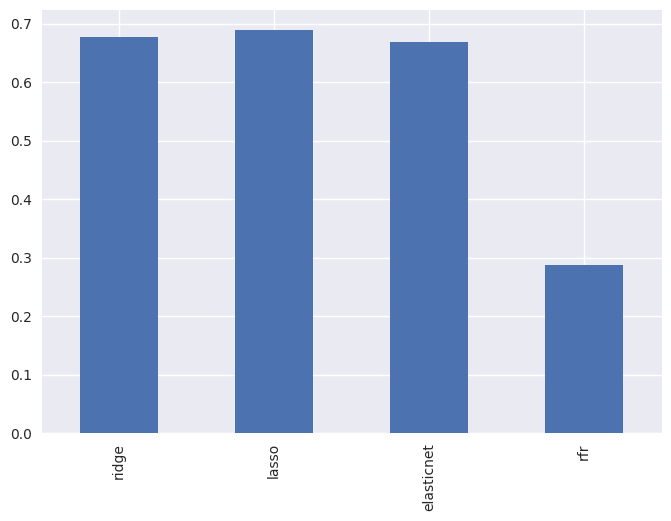

In [43]:
basemodel_df.loc['RMSLE'].plot.bar();

Hence move forward with rfr and apply R
andomizedSearchCV and GridSearchCV

In [44]:
rfr_base_df = pd.DataFrame(basemodel_df['rfr'])
rfr_base_df

,rfr
R2_Score,0.838456
MSLE,0.082338
RMSLE,0.286945
MAE,7033.773957


### RandomizedSearchCV

In [45]:
%%time
# Hyperparameter grid for RandomizedSearchCV
rfr_rs_grid = {
    "n_estimators": np.arange(10, 100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [0.5, 1, "sqrt", "auto"],
    "max_samples": [10000]
}

rfr_rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                                 param_distributions=rfr_rs_grid,
                                 cv=5,
                                 n_iter=10)
rfr_rs_model.fit(X_train, y_train)

CPU times: user 6min 6s, sys: 2.63 s, total: 6min 8s
Wall time: 1min 52s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])})

In [46]:
rfr_rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [47]:
rfr_rs_model.best_estimator_

RandomForestRegressor(max_features='auto', max_samples=10000,
                      min_samples_leaf=5, min_samples_split=4, n_estimators=80,
                      n_jobs=-1, random_state=42)

In [48]:
rfr_rs_score = evaluate_scores(rfr_rs_model.best_estimator_)
rfr_rs_df = pd.DataFrame(rfr_rs_score, index=['rfr_rs']).T
rfr_rs_df

,rfr_rs
R2_Score,0.825862
MSLE,0.084444
RMSLE,0.290593
MAE,7208.315926


No such imporovement

### GridSearchCV

In [49]:
%%time
rfr_gs_grid = {
    "n_estimators": [30, 40, 50],
    "max_depth": [None, 3],
    "min_samples_split": [12, 14, 16],
    "min_samples_leaf": [1,2],
    "max_features": [0.5, 1],
    "max_samples": [20000]
}

rfr_gs_model = GridSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                                 param_grid=rfr_gs_grid,
                                 cv=3)
rfr_gs_model.fit(X_train, y_train)

CPU times: user 25min 2s, sys: 13.1 s, total: 25min 15s
Wall time: 7min 53s


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [None, 3], 'max_features': [0.5, 1],
                         'max_samples': [20000], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [12, 14, 16],
                         'n_estimators': [30, 40, 50]})

In [50]:
rfr_gs_model.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'max_samples': 20000,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 50}

In [51]:
rfr_gs_score = evaluate_scores(rfr_gs_model.best_estimator_)
rfr_gs_df = pd.DataFrame(rfr_gs_score, index=['rfr_gs']).T
rfr_gs_df

,rfr_gs
R2_Score,0.849780
MSLE,0.078894
RMSLE,0.280880
MAE,6840.767381


In [52]:
combined_df = pd.concat([rfr_base_df, rfr_rs_df, rfr_gs_df], axis=1)
combined_df

,rfr,rfr_rs,rfr_gs
R2_Score,0.838456,0.825862,0.849780
MSLE,0.082338,0.084444,0.078894
RMSLE,0.286945,0.290593,0.280880
MAE,7033.773957,7208.315926,6840.767381


Visualize the baseline, RandomizedSearchCV, GridSearchCV model of RandomForestRegressor.

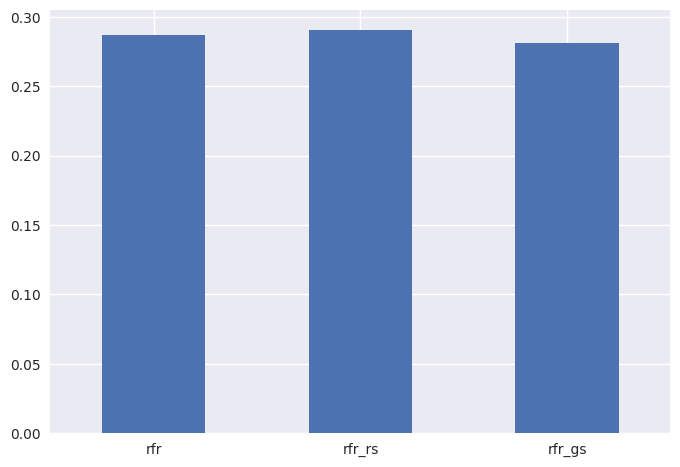

In [53]:
combined_df.loc['RMSLE'].plot.bar()
plt.xticks(rotation=0);

We can see that grid search model works better than other two.
Now, our ideal_model will have same parameter as the grid search model but with `max_samples=none`.

### Ideal Model

In [54]:
%%time

# Most ideal hyperparamters
rfr_ideal_model = RandomForestRegressor(n_estimators=50,
                                    min_samples_leaf=1,
                                    min_samples_split=12,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
rfr_ideal_model.fit(X_train, y_train)

CPU times: user 5min 22s, sys: 788 ms, total: 5min 22s
Wall time: 1min 24s


RandomForestRegressor(max_features=0.5, min_samples_split=12, n_estimators=50,
                      n_jobs=-1, random_state=42)

In [55]:
rfr_ideal_score = evaluate_scores(rfr_ideal_model)
rfr_ideal_df = pd.DataFrame(rfr_ideal_score, index=['rfr_ideal']).T
rfr_ideal_df

,rfr_ideal
R2_Score,0.882327
MSLE,0.060891
RMSLE,0.246760
MAE,5955.706156


## Feature Importance

In [56]:
feature_importance = rfr_ideal_model.feature_importances_

In [57]:
feature_dict = dict(zip(X_train.columns, feature_importance))

In [58]:
feature_df = pd.DataFrame(feature_dict, index=['Feature Importance']).T
feature_df.sort_values(by='Feature Importance', inplace=True, ascending=False)
feature_df

,Feature Importance
YearMade,0.182352
ProductSize,0.153962
fiSecondaryDesc,0.082100
saleYear,0.075107
fiModelDesc,0.049361
...,...
fiProductClassDesc_is_missing,0.000000
ProductGroupDesc_is_missing,0.000000
fiModelDesc_is_missing,0.000000
ProductGroup_is_missing,0.000000


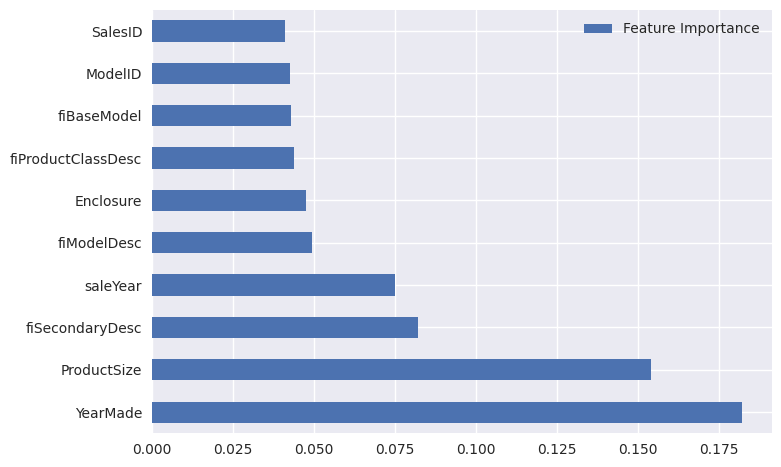

In [59]:
feature_df[:10].plot.barh();

**Obesrvation : `YearMade` and `ProductSize` are the two most important features.**

## Prediction on Test data

In [60]:
test_filepath = '/kaggle/input/bluebook-for-bulldozers/Test.csv'
test_df = pd.read_csv(test_filepath)
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,5/3/2012 0:00,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,5/10/2012 0:00,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,5/10/2012 0:00,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,5/10/2012 0:00,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,5/10/2012 0:00,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the data (getting the test dataset in the same format as out training dataset)

In [61]:
np.random.seed(42)

def preprocess_df(df_temp):
  df_temp['YearMade'].replace(1000, 1995, inplace=True)

  df_temp['saledate'] = pd.to_datetime(df_temp['saledate'])

  df_temp['saleYear'] = df_temp['saledate'].dt.year
  df_temp['saleMonth'] = df_temp['saledate'].dt.month
  df_temp['saleDay'] = df_temp['saledate'].dt.day
  df_temp["saleDayOfWeek"] = df_temp.saledate.dt.dayofweek
  df_temp["saleDayOfYear"] = df_temp.saledate.dt.dayofyear

  df_temp.drop('saledate', axis=1, inplace=True)

  for col in df_temp.columns:
    if pd.api.types.is_numeric_dtype(df_temp[col]):
      if df_temp[col].isna().sum():
        # add a column which tell if data is missing or not
        df_temp[col+'_is_missing'] = df_temp[col].isna()
        df_temp[col].fillna(df_temp[col].median(), inplace=True)

  for col in df_temp.columns:
    if pd.api.types.is_object_dtype(df_temp[col]):
      df_temp[col] = df_temp[col].astype('category')

  for col in df_temp.columns:
    if pd.api.types.is_categorical_dtype(df_temp[col]):
      df_temp[col+'_is_missing'] = df_temp[col].isna()
      df_temp[col] = df_temp[col].cat.codes+1

  return df_temp

In [62]:
test_temp_df = test_df.copy()

#### Apply preprocess function on test data

In [63]:
test_temp_df = preprocess_df(test_temp_df)

Add `auctioneerID_is_missing` to test data because it is missing from it

In [64]:
test_temp_df['auctioneerID_is_missing'] = False

#### Make columns of test and train in same order

In [65]:
test_temp_df = test_temp_df.reindex(X_train.columns, axis=1)

In [66]:
assert test_temp_df.columns.tolist() == X_train.columns.tolist(), "Columns are not the same"

### Predict on test data

In [67]:
test_preds = rfr_ideal_model.predict(test_temp_df)

Create a dataframe to store test_preds

In [68]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = test_df['SalesID']
df_preds['SalePrice'] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,18530.194071
1,1227844,22095.576680
2,1227847,53250.164876
3,1227848,72743.496256
4,1227863,57474.745573
...,...,...
12452,6643171,38597.521681
12453,6643173,11669.379931
12454,6643184,12918.384443
12455,6643186,15663.943467


THE END